In [0]:
# import necessary libraries

import sklearn.datasets as ds
import matplotlib.pyplot as plt
import random
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

# 1. Introduction to Linear Regression 

Linear regression is a predictive model. 
It is the simplest predictive model with the highest interpretability.

## 1.1 Mathematical formulas
Mathematically, **univariate** linear regression (one output) involves the following simple formula:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon$$
where $(x_1,...,x_p)$ are explanatory variables (also called features), $(\beta_0,\beta_1,...,\beta_p)$ are parameters measuring effects of each explanatory variable to response variable and $\epsilon$ is unobservable random error following normal distribution with mean zero and finite variance.

For **multivariate** linear regression (multiple outputs), equation above can be expressed using matrix:
$$Y = X\beta + \epsilon$$
where 
$$Y = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}, \quad X = 
\begin{pmatrix} 
1 & x_{11} & ... & x_{n1} \\
1 & x_{21} & ... & x_{n2} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & ... & x_{np}
\end{pmatrix}, \quad \beta = \begin{pmatrix}
\beta_{0} \\
\beta_{1} \\
\vdots \\
\beta_p
\end{pmatrix} \quad\text{and} \quad \epsilon = \begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n \\
\end{pmatrix}.$$
Note that in the above, we assume that $n$ observations and $p$ features.
So, $X$ is an $n\times(p+1)$ matrix.

In linear regression, the main aim is to choose paramters $\beta$ so that the residual sum of squares (RSS) is minimized:
$$RSS = \| y - \hat{y} \|^2_2 = \| y - X\beta \|_2^2$$
where $y$ is the vector of observed values, $\hat{y}$ is the vector of predicted values by the linear regression model and 
$$\| (x_1,...,x_n) \|_2^2 = \sum_{i=1}^n |x_i|^2 \quad (\text{Euclidean distance}).$$
Since $\|x\|_2^2 = x^Tx,$ applying calculus to minimize RSS leads to 
$$\beta = (X^TX)^{-1} X^T y.$$
Indeed, 
\begin{align*}
\|y - X\beta\|_2^2 & = (y - X\beta)^T (y - X\beta) \\
& = y^Ty - y^TX\beta - \beta^TX^Ty + \beta^T X^T X\beta \\
& = y^Ty - 2\beta^TX^Ty + \beta^T X^T X\beta \quad (\text{since }\beta^TX^Ty\in \mathbb{R}).
\end{align*}
Differentiating with respect to $\beta$ and set it to zero give us 
$$\frac{d}{d\beta}(\|y - X\beta\|_2^2) = -2X^Ty + X^TX\beta = 0,$$
that is, 
$$\beta = (X^TX)^{-1}X^Ty.$$

## 1.2 Assumptions of Linear Regression

Even though linear regression has the highest interpretability among all predictive models, it comes with several assumptions.
They are:

1. Linear relationship between explanatory and response variables.

2. Little or no multicollinearity among explanatory variables.

3. Residuals follow a normal distribution.

4. Little or no autocorrelation in the residuals.

5. Residuals have constant variance.

In the following sections, we will use synthetic dataset to verify the assumptions above.

## 1.2.1. Determine linear relationship by scatter plot

To check existence of linear relationship between explanatory variable and response variable, one can inspect **scatter plot** of collected data.

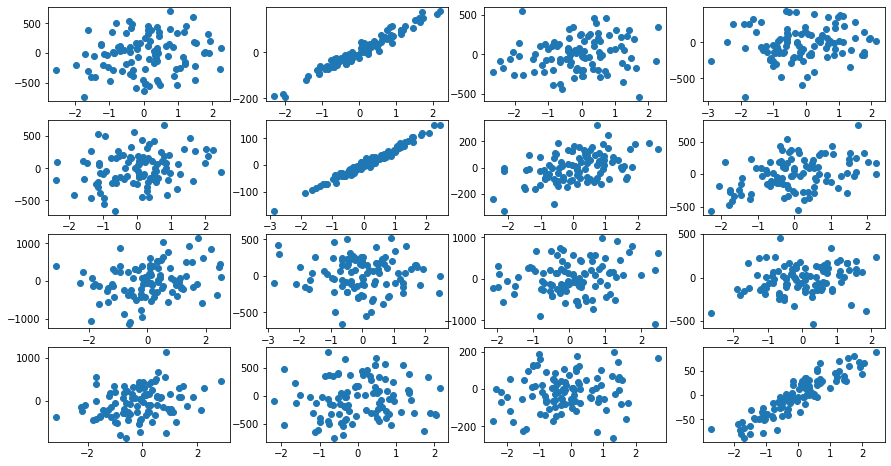

In [3]:
# univarate linear regression
n_features = 1

num_rows = 4
num_cols = 4
num_graphs = num_rows * num_cols

random.seed(10)

_, ax = plt.subplots(num_rows, num_cols, figsize = (15,8))


for i in range(num_graphs):
  # generate regression dataset
  X,y = ds.make_regression(n_samples=100, n_features=1, noise=random.randint(1,500), random_state=i)

  # plot regression dataset
  ax[i//num_cols, i%num_cols].scatter(X,y)

By inspecting all scatter plots above, it seems that only three plots have linear relasionship whereas the remaining plots do not have linear relationship.

In application, one can transform explanatory variable using Power transform or [Box-Cox transformation](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation) to introduce linearity.
However, we will not discuss it here.

## 1.2.2. Little or no multicollinearity among explanatory variables.

In this section, we assume that $p \geq 2,$ that is, at least two explanatory variables.
Otherwise, we do not need to check multicollinearity. 

We also assume that $p << n$.
Otherwise, then the column space of $X$ might not have full rank, which results in $X^T X$ being singular.
This is undesirable as the OLS estimates are calculated by
$$\beta = (X^TX)^{-1}X^Ty.$$

There are several ways to detect multicollinearity:

1. pairwise correlation matrix of explanatory variables or 
2. Variance Inflation Factor (VIF)

Let us fix a dataset with 10 features and 100 samples.

In [0]:
# data with 10 features 
n_features = 10
X, y = ds.make_regression(n_samples=100, n_features=n_features, noise=0, random_state=0)
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [6]:
X

,0,1,2,3,4,5,6,7,8,9
0,-0.502817,-2.288620,0.251484,-0.960504,-0.517519,-0.978830,-0.439190,0.181338,-0.793117,2.412454
1,-0.448165,-2.004216,0.376877,-0.023423,-0.932741,-1.263068,0.452489,0.097896,1.079195,-0.649338
2,-0.074668,0.507239,-0.116230,0.275601,0.365849,1.297825,0.481115,2.759355,1.435049,0.258716
3,-0.311976,-0.792287,-0.531606,-1.006832,1.592771,-0.258573,0.308331,-1.378083,1.681577,-0.840290
4,2.497200,-0.104343,-0.988002,0.564009,-0.505358,-0.815792,-0.507518,-1.051880,-1.284552,-2.245322
...,...,...,...,...,...,...,...,...,...,...
95,-1.405963,0.115148,-0.379148,-0.110489,-1.550429,0.417319,-0.944368,0.238103,-1.660700,-0.590058
96,1.732721,1.519995,1.719589,0.370825,-1.446535,0.800298,-0.309114,-0.233467,0.142062,0.684501
97,-1.601836,0.812674,0.587259,-0.932789,-0.386871,-0.510293,0.183925,-0.385490,1.243319,-0.887181
98,-1.156182,0.426259,0.676908,1.494485,-1.424061,-0.493320,-0.542861,0.416050,-2.069985,0.781198


In [7]:
y

,0
0,11.885493
1,-202.400221
2,469.139796
3,-175.861033
4,-278.985867
...,...
95,-351.934099
96,173.924638
97,-332.351407
98,-63.277363


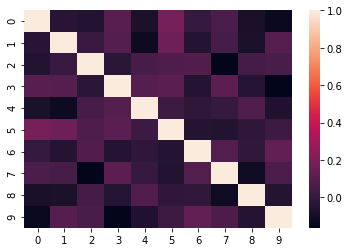

In [13]:
# check multicollinearity among explanatory variables 

corr = X.corr()
sns.heatmap(corr);

As shown by the correlation matrix heatmap above, all explanatory variables are not pairwise correlated.

To determine coefficient of multiple correlation, one needs to use Variance Inflation Factor (VIF).

If VIF of an explanatory variable is greater than 10, then it has collinearity with other explanatory variables and thus should be removed. 

In [22]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns).T

,0,1,2,3,4,5,6,7,8,9
vif,1.098751,1.082689,1.056774,1.087953,1.052662,1.106041,1.042335,1.08916,1.033879,1.093846


From dataframe above, all explanatory variables have VIF less than 10.
So, there is no multicollinearity in our data.

## 1.2.3./1.2.4./1.2.5. Residuals follow a normal distribution, Little or no autocorrelation in the residuals and Residuals have constant variance.


In this section, one can use summary function in statsmodel to check the three assumptions above.

After checking linearity and multicollinearity, one can fit linear regression to data to obtain OLS estimate $\beta.$

In Python, there are two modules offering linear Regression: **sklearn** and **statsmodel**.

Sklearn has a more comprehensive documentation than statsmodel and it has a bigger community.
On the other hand, statsmodel offer a comprehensive statistical analysis of OLS in a single function summary.
Since our aim of this notebook is to perform statistical analysis, we will use statsmodel to fit data.

In [23]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.010e+31
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        08:29:12   Log-Likelihood:                 2775.2
No. Observations:                 100   AIC:                            -5528.
Df Residuals:                      89   BIC:                            -5500.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.017e-14   2.41e-14      2.910      0.0

As shown by the statsmodel summary function above, it gives a comprehensive statistical analysis.
However, one should understand all terminalogies used above and their interpretations. 

The first row containing R-squared, Adj. R-squared, F-statistics, etc, analyses the goodness-of-fit of the linear regression model to the data. 

The second row contains OLS estimates $\beta$ and their corresponding confidence interval and hypothesis testing (whether they should be zero or not).

The third row analyses residuals of the linear regression model.


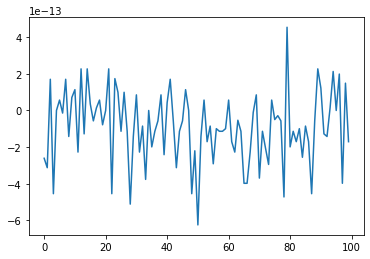

In [24]:
# plot of residual
residual = model.resid
plt.plot(residual);

In [25]:
from scipy.stats import jarque_bera
test_stats, p = jarque_bera(residual)

print('Jarque-Bera Test')
print('test statistics: ', test_stats)
print('p-value: ', p)

Jarque-Bera Test
test statistics:  0.8697992561701351
p-value:  0.6473296375326874


Since p-value in Jarque-Bera test and Omnibus test (omnibus normality test) are more than 0.05, the residuals might follow a normal distribution.

In the [Durbin-Watson test](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic), its test statistics is approximately $2(1-r)$ where $r$ is the autocorrelation of residuals.
In this case, since its test statistics is $1.794 \approx 2,$ we conclude that $r \approx 0,$ that is, residuals have almost zero autorcorrelation.

Heteroskedasticity tests: Breush-Pagan test and Goldfeld-Quandt test

In both tests, their null hypothesis is that all variances are the same.

In [26]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residual, model.model.exog)
for x,y in zip(name, test):
  print(x,y)

Lagrange multiplier statistic 48.250734415764704
p-value 5.585466483271335e-07
f-value 8.298311704565066
f p-value 2.2504634830523774e-09


Since p-values of F-statistics is less than 0.05, residuals have heteroskedasticity.

In [27]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, model.model.exog)
for x,y in zip(name, test):
  print(x,y)

F statistic 1.201366726355278
p-value 0.2847468129739712


Since the p-value is greater than 0.05, it suggests that residuals have equal variance.

This concludes the introduction of checking liner regression's assumptions.